In [11]:
import pandas as pd
import pickle
with open('tempresults', 'rb') as f:
    resultdf = pickle.load(f)
    
    
    

In [ ]:
print(resultdf)

In [ ]:
!pip install dtale

In [4]:
print("hey")

hey


<Axes: >

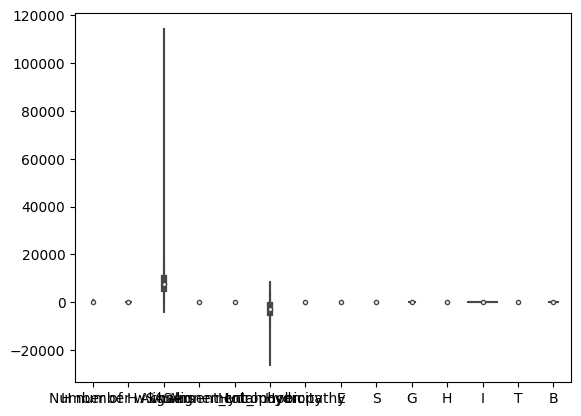

In [8]:

import seaborn as sns
resultdf_filtered = resultdf.drop(['DF_DSSP', 'DF_H', 'PDB_ID', 'AAseq',"is_amyloid"], axis=1)
sns.violinplot(data=resultdf_filtered)

In [14]:
from sklearn import preprocessing

x = resultdf_filtered.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
resultdf_filtered_normalised = pd.DataFrame(x_scaled)

In [18]:
import dtale
dtale.show(resultdf_filtered_normalised)


In [ ]:
# Ajout d'une variable pareille pour toutes les colonnes
resultdf_filtered_normalised["all"] = ""
sns.violinplot(data=resultdf_filtered_normalised, x="is_amyloid", hue="is_amyloid")

/tmp/ipykernel_11739/1181692565.py:2: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



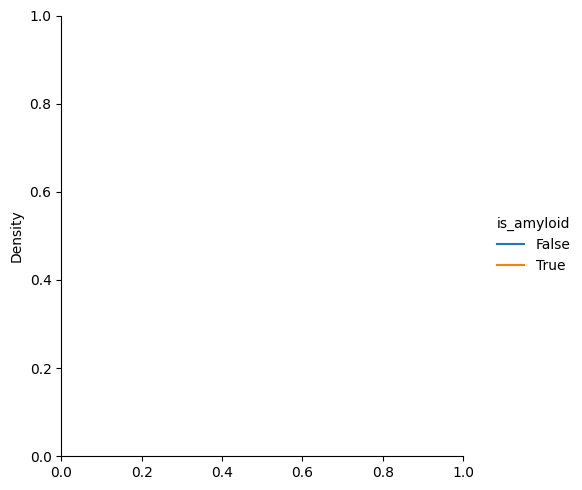

In [20]:
resultdf_filtered_normalised["is_amyloid"] = resultdf["is_amyloid"]
sns.displot(data=resultdf_filtered_normalised,x=14, hue="is_amyloid",kind="kde")

In [23]:
from IPython.display import display, HTML
display(resultdf_filtered_normalised)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,is_amyloid
0,0.019643,0.025707,0.004450,0.466116,0.393729,0.819390,0.474685,0.735779,0.458694,0.000000,0.000000,0.0,0.000000,0.000000,True
1,0.013096,0.017138,0.003603,0.279670,0.458191,0.782214,0.448506,0.427672,0.807927,0.000000,0.000000,0.0,0.000000,0.000000,True
2,0.043447,0.049751,0.014829,0.666158,0.490422,0.837903,0.493291,0.742624,0.090187,0.000000,0.000000,0.0,0.568992,0.000000,True
3,0.029363,0.016812,0.003581,0.652563,0.658023,0.782078,0.448506,0.695136,0.504762,0.000000,0.000000,0.0,0.000000,0.000000,True
4,0.039389,0.012887,0.001283,0.570992,0.692761,0.774557,0.452787,0.672270,0.367394,0.000000,0.000000,0.0,0.257544,0.000000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,0.000000,0.000000,0.059690,0.037442,0.993949,0.679295,0.411377,0.044156,0.091497,0.309740,0.735632,0.0,0.157881,0.000000,False
339,0.000000,0.000000,0.085493,0.508999,0.987154,0.628473,0.388738,0.636962,0.218966,0.085925,0.121727,0.0,0.233589,0.027448,False
340,0.000254,0.000073,0.067122,0.290014,0.996445,0.682318,0.434922,0.369319,0.185507,0.096847,0.363178,0.0,0.263281,0.030937,False
341,0.000657,0.000167,0.073317,0.000000,0.985540,0.703082,0.450729,0.000000,0.135796,0.245472,0.728745,0.0,0.172043,0.039207,False


['Number of H', 'H number w chains', 'SASA', 'Alignement_total', 'Alignement_moyen', 'Hydrophobicity', 'Hydropathy', 'E', 'S', 'G', 'H', 'I', 'T', 'B']


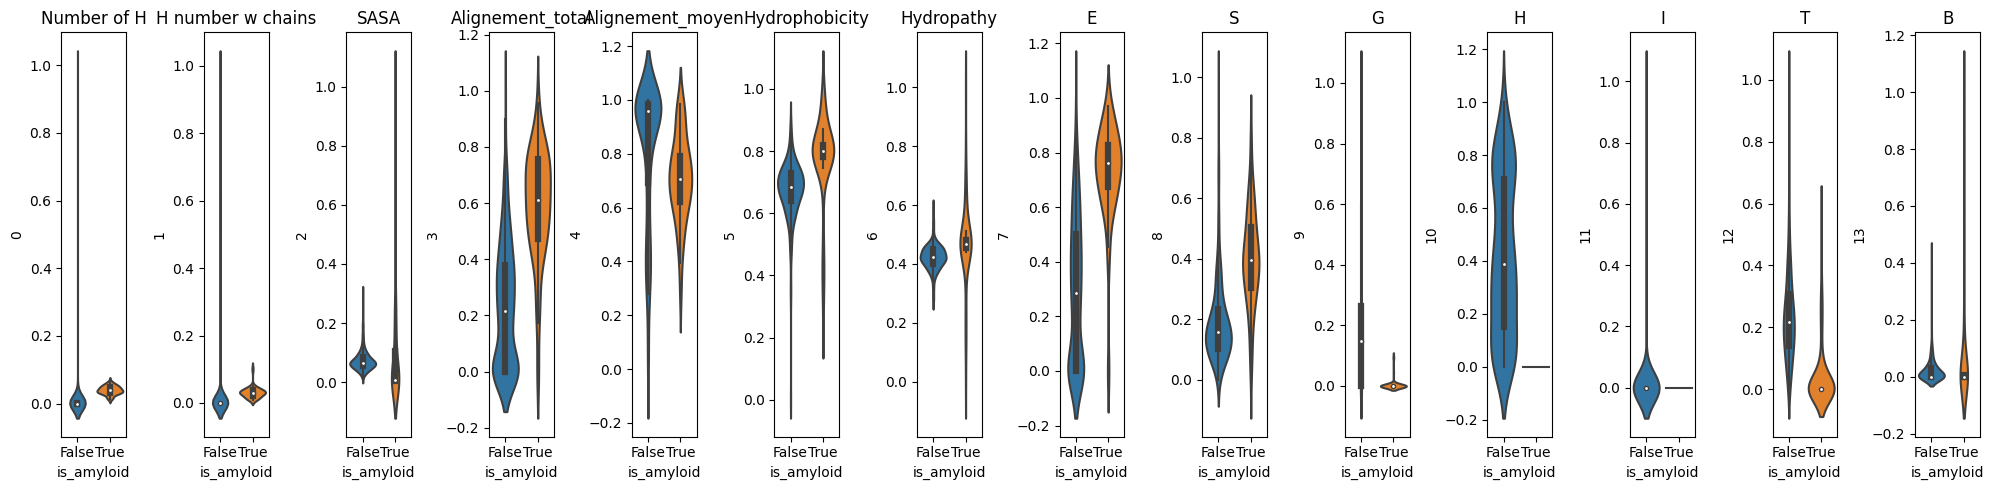

In [41]:
grouped = resultdf_filtered_normalised.groupby('is_amyloid')

# create a figure with subplots for each descriptor
fig, axes = plt.subplots(nrows=1, ncols=len(resultdf_filtered_normalised.columns[:-1]), figsize=(20,5))
columns_name = list(resultdf_filtered.columns)
print(columns_name)
# loop through each descriptor and create a violin plot or boxplot
for i, col in enumerate(resultdf_filtered_normalised.columns[:-1]):
    sns.violinplot(x='is_amyloid', y=col, data=resultdf_filtered_normalised, ax=axes[i], split=True)
    axes[i].set_title(columns_name[i])

plt.tight_layout()
plt.show()
fig.savefig("violin_plot.png") 

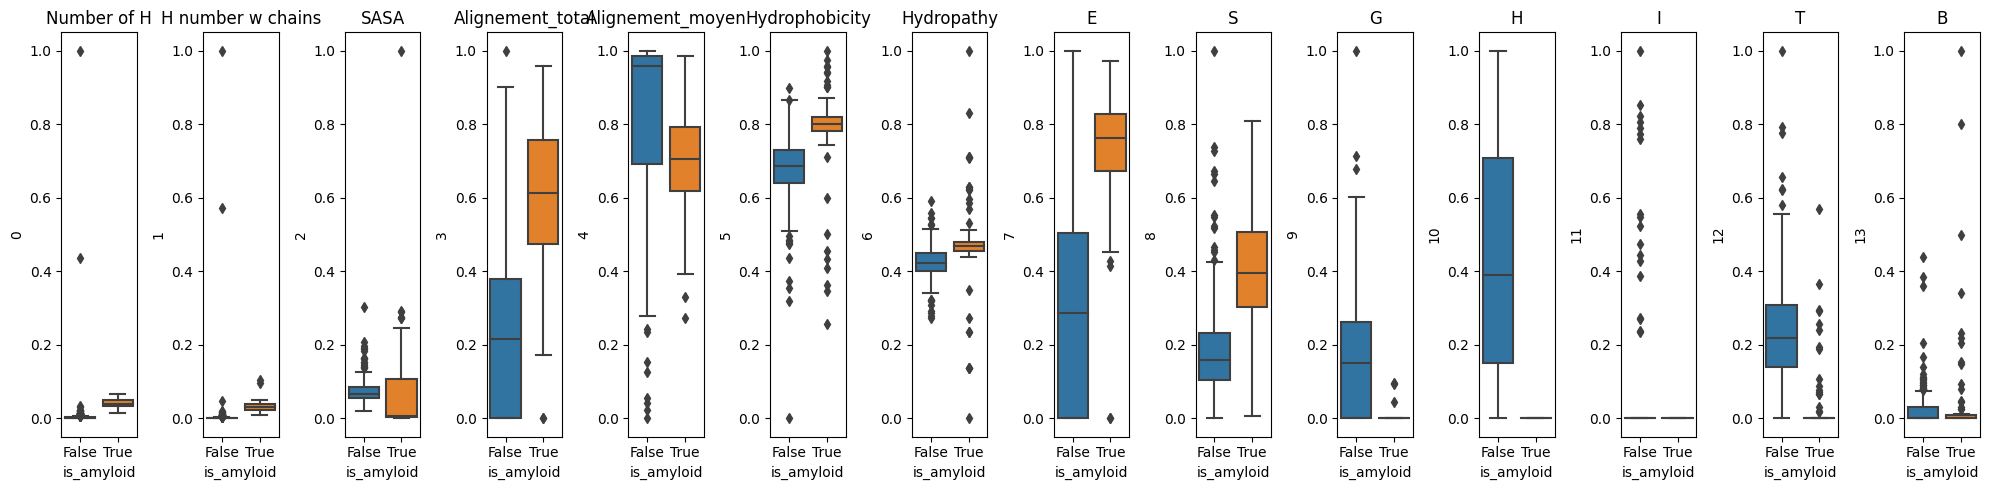

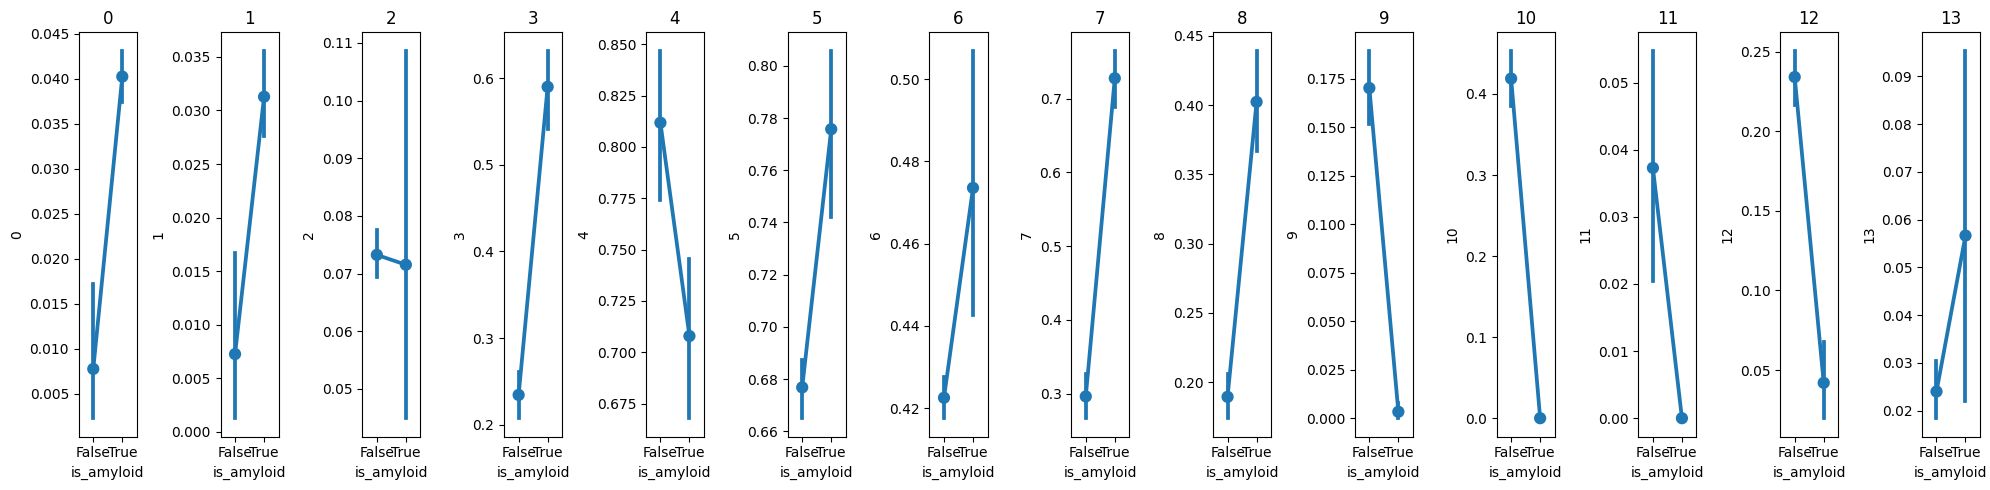

In [42]:
import seaborn as sns

# group the data by amyloid status
grouped = resultdf_filtered_normalised.groupby('is_amyloid')

# create a figure with subplots for each descriptor
fig, axes = plt.subplots(nrows=1, ncols=len(resultdf_filtered_normalised.columns[:-1]), figsize=(20,5))

# loop through each descriptor and create a box plot
for i, col in enumerate(resultdf_filtered_normalised.columns[:-1]):
    sns.boxplot(x='is_amyloid', y=col, data=resultdf_filtered_normalised, ax=axes[i])
    axes[i].set_title(columns_name[i])

plt.tight_layout()
plt.show()
fig.savefig("boxplot.png") 

# create a figure with subplots for each descriptor
fig, axes = plt.subplots(nrows=1, ncols=len(resultdf_filtered_normalised.columns[:-1]), figsize=(20,5))

# loop through each descriptor and create a diff plot
for i, col in enumerate(resultdf_filtered_normalised.columns[:-1]):
    sns.pointplot(x='is_amyloid', y=col, data=resultdf_filtered_normalised, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

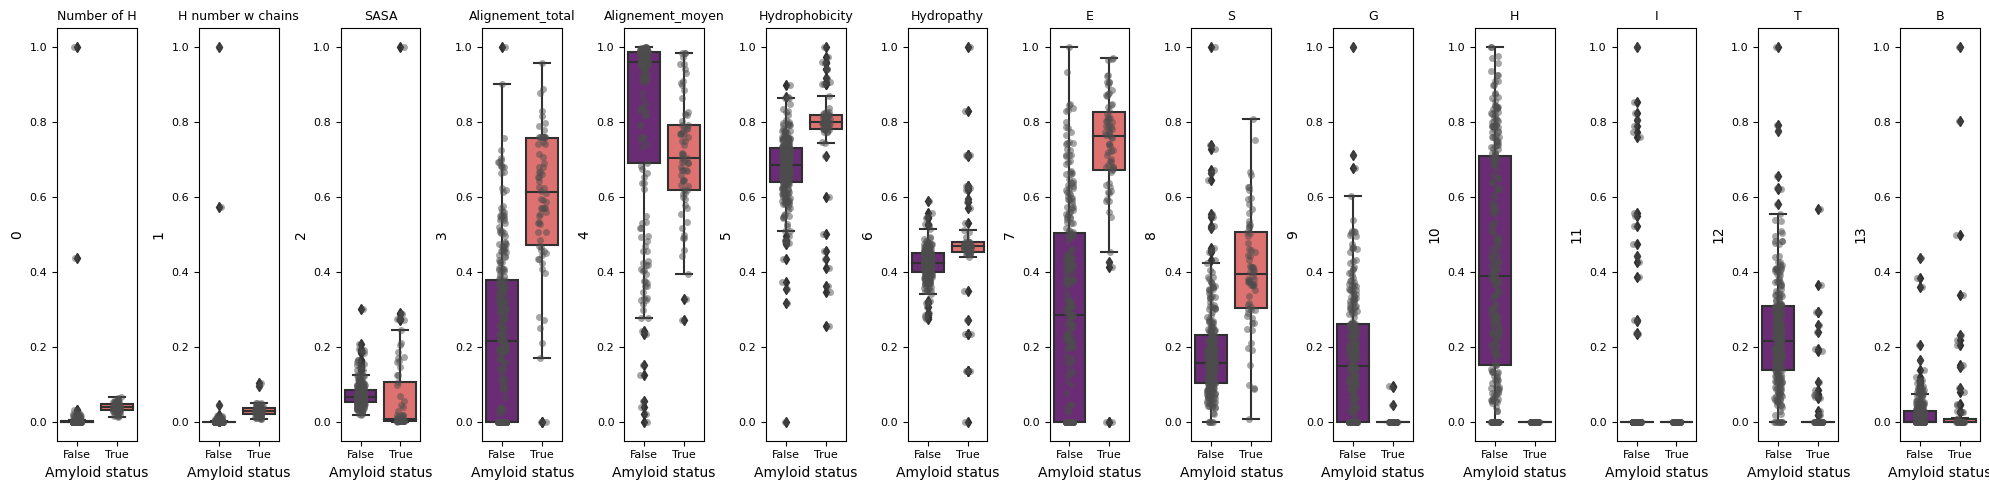

2023-05-10 12:43:00,942 - INFO     - Executing shutdown due to inactivity...
2023-05-10 12:43:00,952 - INFO     - Executing shutdown...
2023-05-10 12:43:00,954 - ERROR    - Exception on /shutdown [GET]
Traceback (most recent call last):
  File "/home/meuret/anaconda3/envs/louis/lib/python3.11/site-packages/flask/app.py", line 2190, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/meuret/anaconda3/envs/louis/lib/python3.11/site-packages/flask/app.py", line 1486, in full_dispatch_request
    rv = self.handle_user_exception(e)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/meuret/anaconda3/envs/louis/lib/python3.11/site-packages/flask/app.py", line 1484, in full_dispatch_request
    rv = self.dispatch_request()
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/meuret/anaconda3/envs/louis/lib/python3.11/site-packages/flask/app.py", line 1469, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by amyloid status
grouped = resultdf_filtered_normalised.groupby('is_amyloid')

# Create a figure with subplots for each descriptor
fig, axes = plt.subplots(nrows=1, ncols=len(resultdf_filtered_normalised.columns[:-1]), figsize=(20,5))

# Loop through each descriptor and create a violin plot or boxplot
for i, col in enumerate(resultdf_filtered_normalised.columns[:-1]):
    sns.boxplot(x='is_amyloid', y=col, data=resultdf_filtered_normalised, ax=axes[i], palette='magma')
    sns.stripplot(x='is_amyloid', y=col, data=resultdf_filtered_normalised, ax=axes[i], color=".3", alpha=0.5)
    axes[i].set_title(columns_name[i], fontsize=9, wrap=True)
    axes[i].set_xlabel('Amyloid status', fontsize=10)
    #axes[i].set_ylabel('Normalized values', fontsize=10)
    axes[i].tick_params(axis='both', which='major', labelsize=8)

plt.tight_layout()
plt.show()


In [19]:
import matplotlib.pyplot as plt

# Step 2: Load your dataframe into pandas
# Step 3: Define a list of the column names for the descriptors you want to plot
descriptor_cols = resultdf_filtered_normalised.drop(["is_amyloid"], axis=1)

# Step 4: Create a new dataframe that contains only the columns in the list you defined in step 3, as well as the "is_amyloid" column

# Step 5: Use the pandas groupby function to group the new dataframe by the "is_amyloid" column
grouped_df = resultdf_filtered_normalised.groupby("is_amyloid")

all_values_df = pd.DataFrame()
for col in descriptor_cols:
    temp_df = pd.DataFrame()
    for group, data in grouped_df:
        temp_df[group] = data[col].values
    all_values_df[col] = temp_df.stack().reset_index(drop=True)


# Step 7: Use seaborn's violinplot function with the "hue" parameter set to the "is_amyloid" column to create a violin plot that shows the distribution of values for each group
sns.violinplot(data=all_values_df, x="variable", y="value", hue="is_amyloid", split=True)
plt.show()

KeyError: "['is_amyloid'] not found in axis"

In [52]:
df = resultdf_filtered_normalised.drop(["is_amyloid","all"], axis=1)
print(df)
sns.boxplot(data=resultdf_filtered_normalised,hue="is_amyloid", x = )

            0         1         2         3         4         5         6  \
0    0.019643  0.025707  0.004450  0.466116  0.393729  0.819390  0.474685   
1    0.013096  0.017138  0.003603  0.279670  0.458191  0.782214  0.448506   
2    0.043447  0.049751  0.014829  0.666158  0.490422  0.837903  0.493291   
3    0.029363  0.016812  0.003581  0.652563  0.658023  0.782078  0.448506   
4    0.039389  0.012887  0.001283  0.570992  0.692761  0.774557  0.452787   
..        ...       ...       ...       ...       ...       ...       ...   
338  0.000000  0.000000  0.059690  0.037442  0.993949  0.679295  0.411377   
339  0.000000  0.000000  0.085493  0.508999  0.987154  0.628473  0.388738   
340  0.000254  0.000073  0.067122  0.290014  0.996445  0.682318  0.434922   
341  0.000657  0.000167  0.073317  0.000000  0.985540  0.703082  0.450729   
342  0.003105  0.000711  0.066621  0.338912  0.995300  0.669778  0.482424   

            7         8         9        10   11        12        13  
0   

ValueError: Cannot use `hue` without `x` and `y`

In [53]:
df = sns.load_dataset("titanic")

URLError: <urlopen error [Errno -2] Name or service not known>